In [33]:
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

array(['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far betw

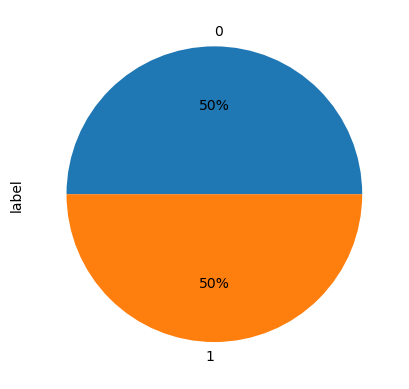

In [34]:
import pandas as pd

train_dataset = pd.read_parquet('imdb-data/train-00000-of-00001.parquet')
train_dataset.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

x_train = train_dataset.text.values
x_train

array(['I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as th

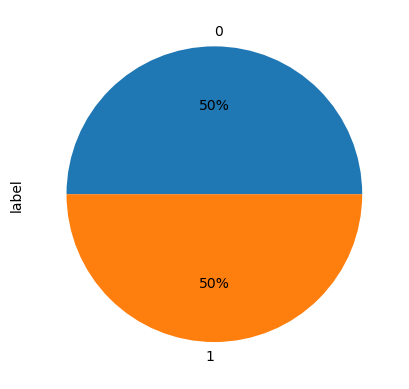

In [35]:
test_dataset = pd.read_parquet('imdb-data/test-00000-of-00001.parquet')
test_dataset.label.value_counts().plot(kind='pie', autopct='%1.0f%%')

x_test = test_dataset.text.values
x_test

### Data Preprocessing

In [36]:
import re
from bs4 import BeautifulSoup
import spacy

nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = re.sub(r"[^a-zA-Z]", ' ', text.lower())
    doc = nlp(text)
    
    return ' '.join(token.lemma_ for token in doc if not token.is_stop)

train_dataset['text'] = train_dataset['text'].apply(clean_text)
test_dataset['text'] = test_dataset['text'].apply(clean_text)

/Users/wonghaucherng/anaconda3/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [37]:
x_train = train_dataset.text.values
x_train

array(['rent curious yellow video store controversy surround release        hear seize u s   custom try enter country   fan film consider   controversial   plot center young swedish drama student name lena want learn life   particular want focus attention make sort documentary average swede think certain political issue vietnam war race issue united states   ask politician ordinary denizen stockholm opinion politic   sex drama teacher   classmate   married man kill curious yellow     year ago   consider pornographic     sex nudity scene far   s shoot like cheaply porno   countryman mind find shocking   reality sex nudity major staple swedish cinema   ingmar bergman   arguably answer good old boy john ford   sex scene film commend filmmaker fact sex show film show artistic purpose shock people money show pornographic theater america   curious yellow good film want study meat potato   pun intend   swedish cinema     film doesn t plot',
       '  curious   yellow   risible pretentious ste

### TD-IDF

In the bag of words approach, each word has the same weight. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual documents contribute more towards classification.

TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

In [38]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

vectorized_train_dataset = vectorizer.fit_transform(train_dataset['text']).toarray()
vectorize_test_dataset = vectorizer.fit_transform(test_dataset['text']).toarray()

vectorizer.fit_transform(train_dataset['text']).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10498519, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Model Training

In [39]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(vectorized_train_dataset, train_dataset['label'])

RandomForestClassifier(n_estimators=200, random_state=0)

### Modal Testing

In [40]:
predictions = text_classifier.predict(vectorize_test_dataset)

### Confusion Matrix

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_dataset['label'],predictions))
print(classification_report(test_dataset['label'],predictions))
print(accuracy_score(test_dataset['label'], predictions))

[[6110 6390]
 [4606 7894]]
              precision    recall  f1-score   support

           0       0.57      0.49      0.53     12500
           1       0.55      0.63      0.59     12500

    accuracy                           0.56     25000
   macro avg       0.56      0.56      0.56     25000
weighted avg       0.56      0.56      0.56     25000

0.56016
